# Visualització de dades i reducció de dimensionalitat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

## Conjunt de dades d'exemple: Pingüins

In [2]:
df = sns.load_dataset("penguins").dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [17]:
df.isnull().sum()
# df.shape() # dimensión del data frame
df.dtypes # tipo de datos columnas del data frame

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [16]:
df[["species", "island", "sex"]] = df[["species", "island", "sex"]].astype("category")
df.loc[:,["species", "island", "sex"]].astype("category")

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male
...,...,...,...
338,Gentoo,Biscoe,Female
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


## Estadístiques bàsiques

### Mitjana

In [18]:
np.mean(df["bill_length_mm"])

43.99279279279279

In [19]:
np.sum(df["bill_length_mm"]) / np.size(df["bill_length_mm"])

43.99279279279279

### Mediana, mínim, màxim, i quartils

In [20]:
np.median(df["bill_length_mm"])

44.5

In [21]:
np.min(df["bill_length_mm"]), np.max(df["bill_length_mm"])

(32.1, 59.6)

In [22]:
np.percentile(df["bill_length_mm"], [0, 25, 50, 75, 100])

array([32.1, 39.5, 44.5, 48.6, 59.6])

### Variància i desviació estàndard

In [23]:
np.var(df["bill_length_mm"])

29.81652463274087

In [24]:
np.std(df["bill_length_mm"])

5.460450955071464

In [25]:
np.sqrt(np.var(df["bill_length_mm"]))

5.460450955071464

### Descripció completa del data frame

In [26]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


## Exploració gràfica

### Histograma

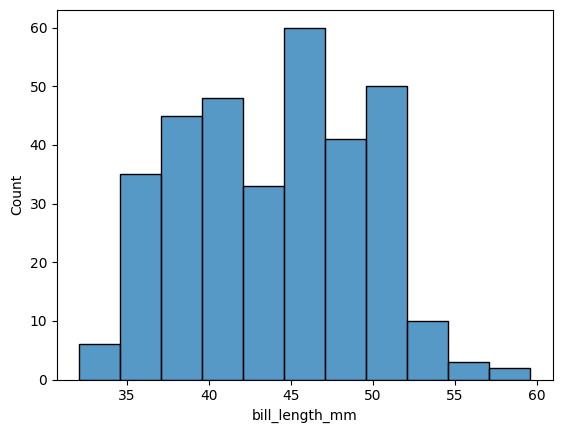

In [ ]:
sns.histplot(df["bill_length_mm"]);

<Axes: >

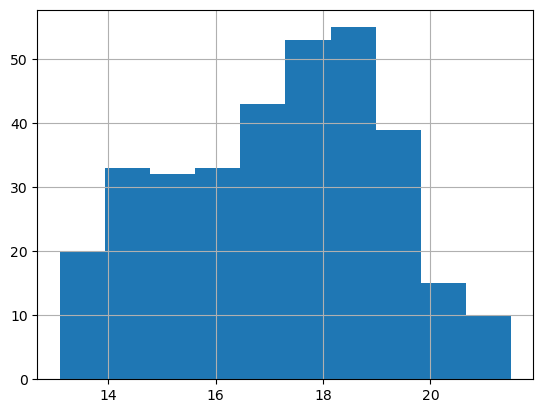

In [28]:
df["bill_depth_mm"].hist()

### *Kernel density estimate* (KDE)

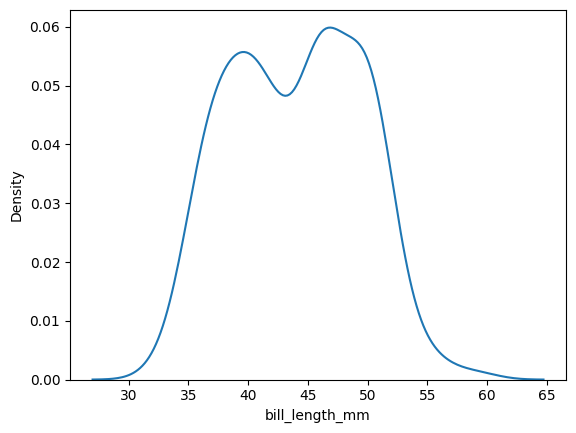

In [ ]:
sns.kdeplot(df["bill_length_mm"]);

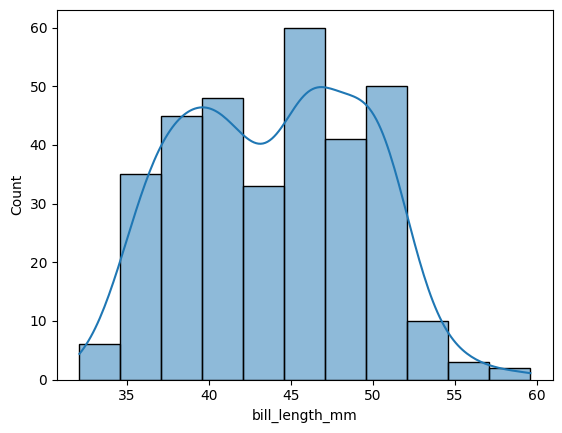

In [ ]:
sns.histplot(df["bill_length_mm"], kde=True);

### Gràfica de caixes

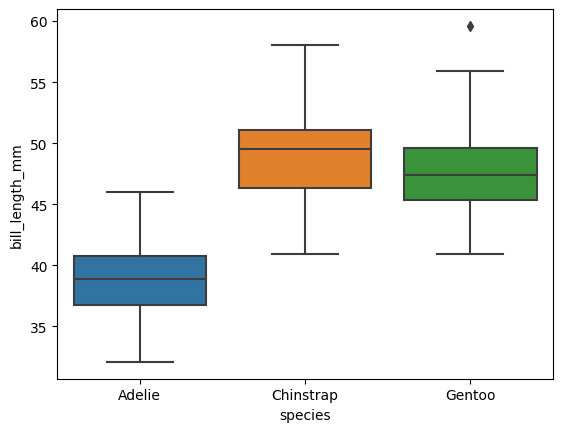

In [ ]:
sns.boxplot(x=df["species"], y=df["bill_length_mm"]);

In [29]:
df[(df["species"] == "Gentoo") & (df["bill_length_mm"] > 58)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


In [30]:
df[df["species"] == "Gentoo"].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,119.000000,119.000000,119.000000,119.000000
mean,47.568067,14.996639,217.235294,5092.436975
std,3.106116,0.985998,6.585431,501.476154
min,40.900000,13.100000,203.000000,3950.000000
25%,45.350000,14.200000,212.000000,4700.000000
50%,47.400000,15.000000,216.000000,5050.000000
75%,49.600000,15.750000,221.500000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


### Gràfica de dispersió

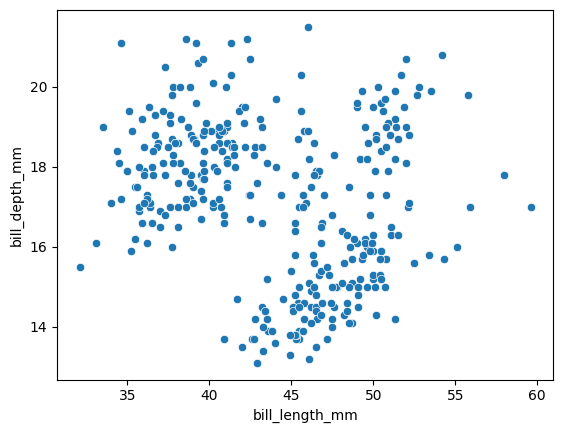

In [ ]:
sns.scatterplot(x=df["bill_length_mm"], y=df["bill_depth_mm"]);

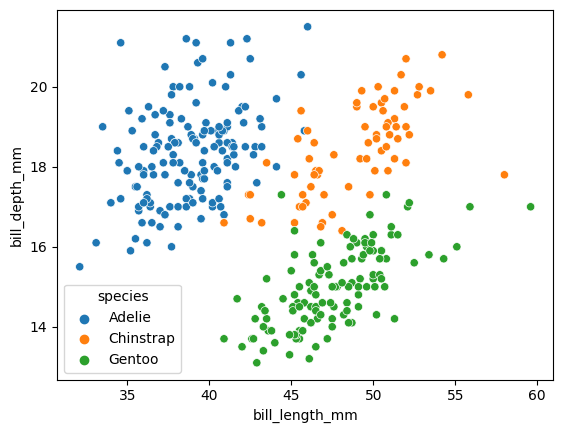

In [ ]:
sns.scatterplot(x=df["bill_length_mm"], y=df["bill_depth_mm"], hue=df["species"]);

### Gràfica de dispersió 3D

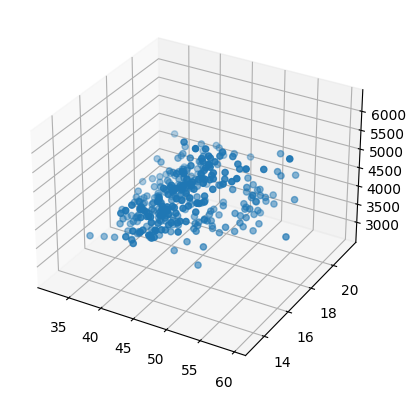

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df["bill_length_mm"], df["bill_depth_mm"], df["body_mass_g"]);

### (extra)

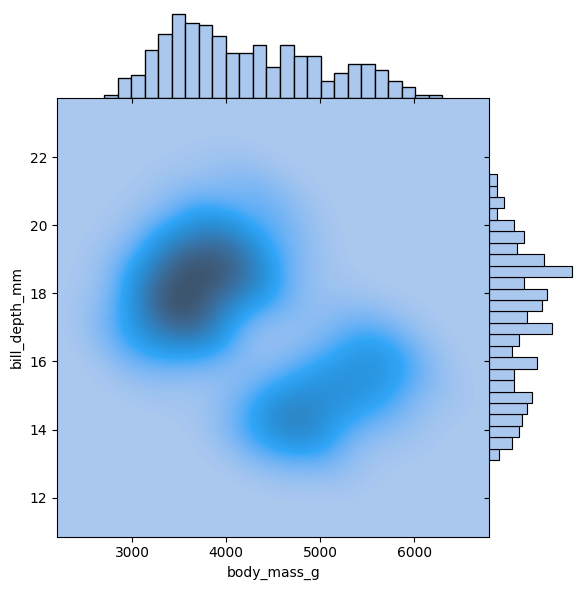

In [ ]:
g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100)
g.plot_marginals(sns.histplot, color="#AAC8EE", alpha=1, bins=25);

### Gràfiques per parelles

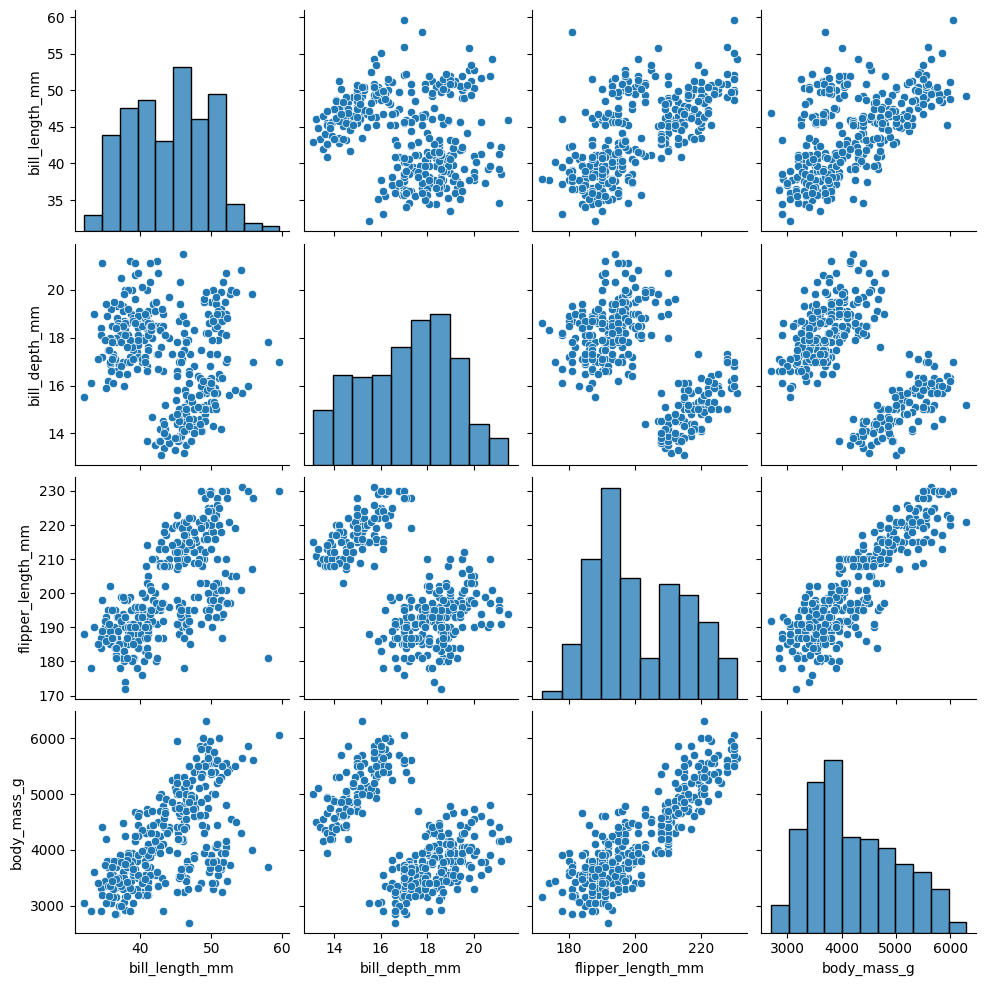

In [ ]:
sns.pairplot(df, kind="scatter");

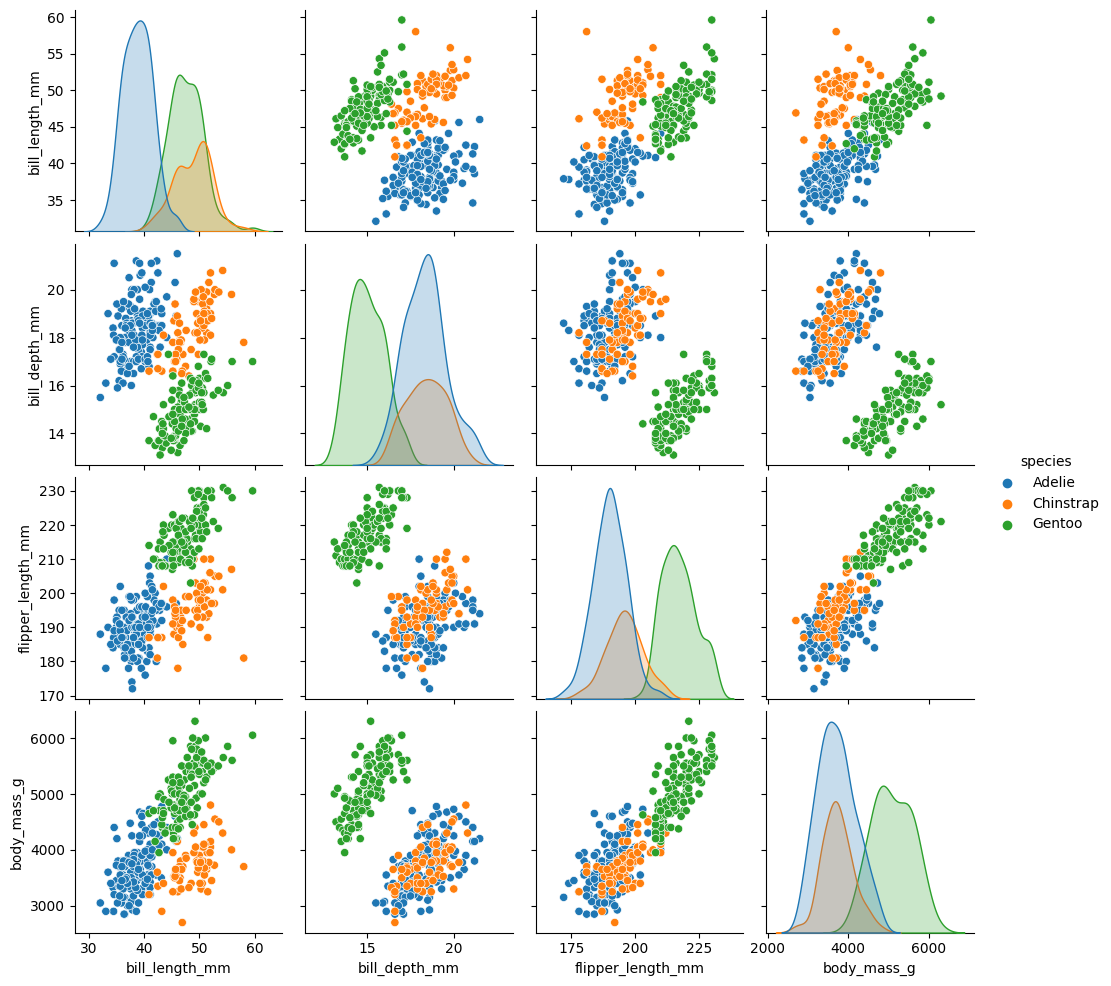

In [ ]:
sns.pairplot(df, kind="scatter", hue="species");

### Correlograma

<ipython-input-24-8a7d891b5bcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, vmin=-1, vmax=1, annot=True);


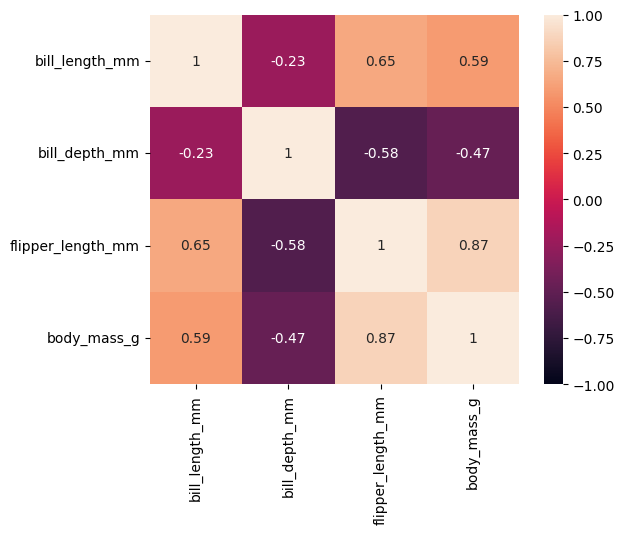

In [ ]:
sns.heatmap(df.corr(), square=True, vmin=-1, vmax=1, annot=True);

<ipython-input-25-b2f8be87b101>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df["species"] == "Gentoo"].corr(), square=True, vmin=-1, vmax=1, annot=True);


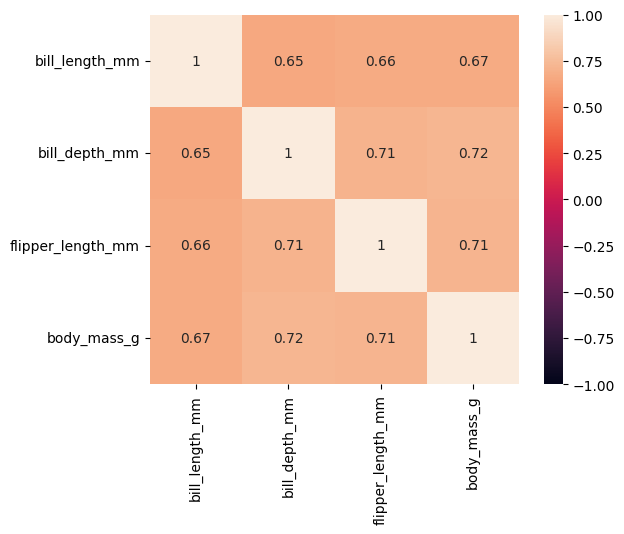

In [ ]:
sns.heatmap(df[df["species"] == "Gentoo"].corr(), square=True, vmin=-1, vmax=1, annot=True);

## Estandardització

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
scaler.fit(numeric_cols)
numeric_cols_std = scaler.transform(numeric_cols)
df_std = df.copy()
df_std[["bill_length_mm", "bill_depth_mm", "flipper_length_mm",	"body_mass_g"]] = numeric_cols_std
df_std

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [ ]:
df_std.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00


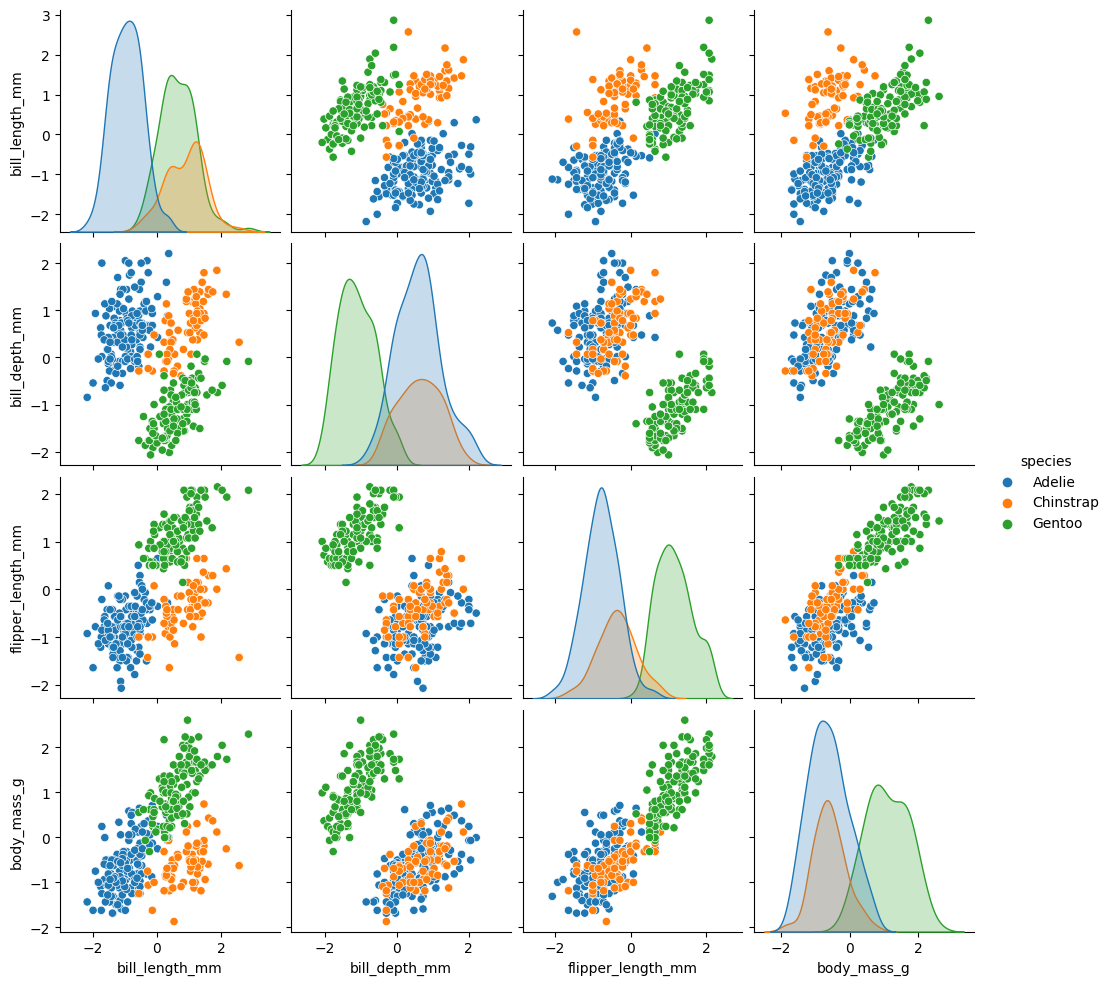

In [ ]:
sns.pairplot(df_std, kind="scatter", hue="species");

## Anàlisi de components principals

In [ ]:
from sklearn.decomposition import PCA

### Exemple sintètic

#### Intuïció del PCA i conceptes bàsics

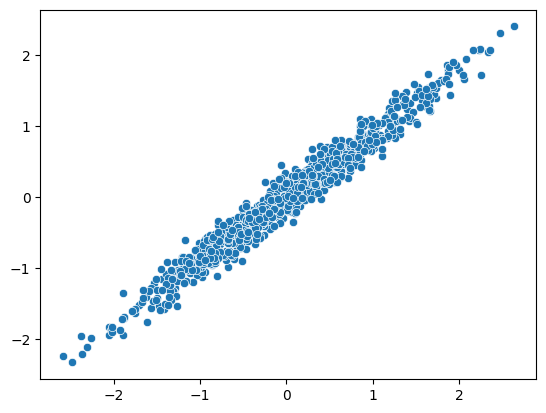

In [ ]:
X = (np.random.rand(2, 2) @ np.random.randn(2, 1000)).T
sns.scatterplot(x=X[:, 0], y=X[:, 1]);

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[ 0.74282511  0.66948552]
 [-0.66948552  0.74282511]]


Per tant:
* PC0 = 0.74 X0 + 0.67 X1
* PC1 = -0.67 X0 + 0.74 X1

In [ ]:
print(pca.explained_variance_)

[1.34419318 0.01181609]


In [ ]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                    linewidth = 2,
                    shrinkA = 0, shrinkB = 0, color = "red")
    ax.annotate('', v1, v0, arrowprops = arrowprops)

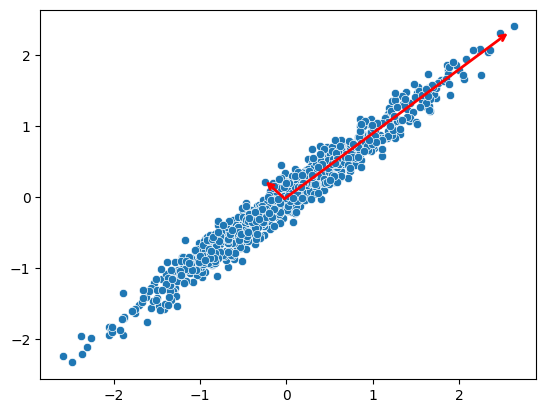

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

#### Reducció de dimensionalitat

<Axes: >

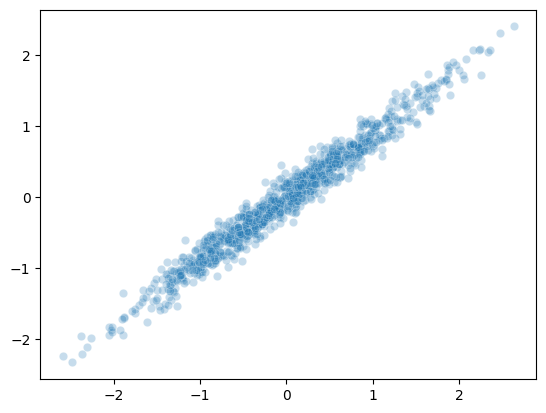

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.25)
sns.scatterplot(X_new[:, 0], y=X_new[:, 1], alpha = 0.75)

### Exemple dels pingüins

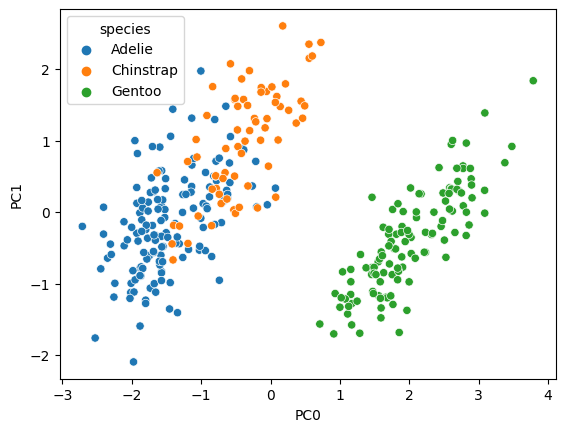

In [ ]:
pca = PCA().fit(numeric_cols_std)
X_pca = pca.transform(numeric_cols_std)
y = df["species"]
pca_df = pd.DataFrame({"PC0": X_pca[:, 0], "PC1": X_pca[:, 1], "species": df["species"]})
sns.scatterplot(x=pca_df["PC0"], y=pca_df["PC1"], hue=df["species"]);

### *Scree plot*

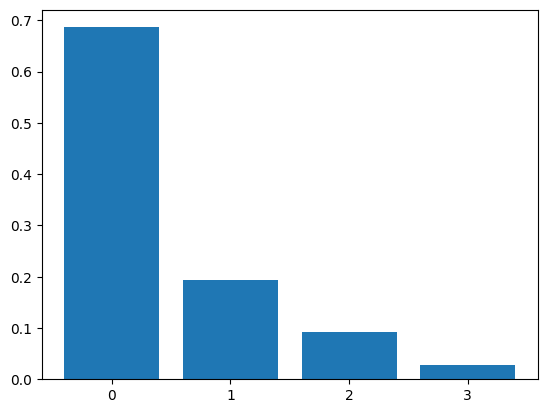

In [ ]:
plt.bar(np.arange(4), pca.explained_variance_ratio_)
plt.xticks(np.arange(4));

### *Biplot*

No hi ha una funció del scikit-learn o del seaborn (encara).

El següent codi està adaptat de
https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot.

In [ ]:
def biplot(score, coeff, colors, labels = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    sns.scatterplot(x=xs*scalex, y=ys*scaley, hue=colors)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i}", color='r', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='r', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC0")
    plt.ylabel("PC1")
    plt.grid()

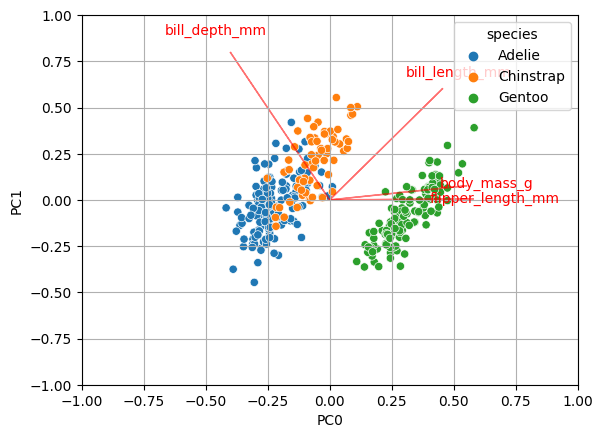

In [ ]:
biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), df["species"], numeric_cols.columns)

In [ ]:
numeric_cols.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [ ]:
pca.components_

array([[ 0.45375317, -0.39904723,  0.576825  ,  0.54967471],
       [ 0.6001949 ,  0.79616951,  0.00578817,  0.07646366],
       [ 0.64249509, -0.42580043, -0.23609516, -0.59173738],
       [ 0.14516955, -0.1599044 , -0.78198369,  0.58468615]])

## Escalat multidimensional

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


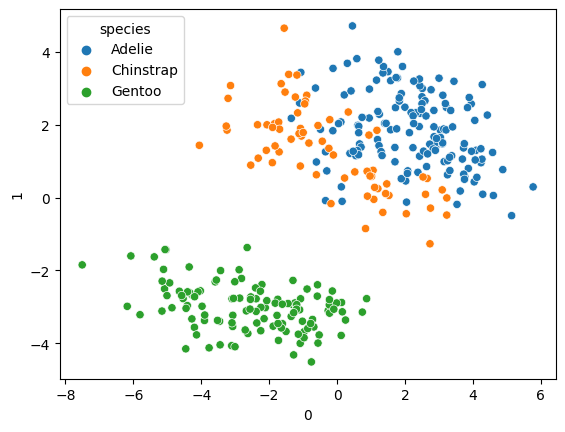

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import DistanceMetric
mds = MDS(n_components=2, dissimilarity="precomputed")
manhattan_distance_metric = DistanceMetric.get_metric("manhattan")
manhattan_dist = manhattan_distance_metric.pairwise(numeric_cols_std)
X_mds_manhattan = mds.fit_transform(manhattan_dist)
mds_manhattan_df = pd.DataFrame({0: X_mds_manhattan[:, 0], 1: X_mds_manhattan[:, 1], "species": df["species"]})
sns.scatterplot(x=mds_manhattan_df[0], y=mds_manhattan_df[1], hue=df["species"]);

Més distàncies: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html.

## Exercicis

### Exercici 1: Iris (flors)

In [32]:
from sklearn.datasets import load_iris
X = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
y = pd.Series(load_iris().target, name="species").astype("category")
df = pd.concat((X, y), axis=1)

- Visualitza les dades i aconsegueix saber com es distribueixen i com es diferencien les diferents espècies de flors.
- Redueix la dimensionalitat per a veure flors similars en una gràfica bidimensional o tridimensional.

In [63]:
if df.isnull().sum().sum() == 0: print("No NaN values")
print("Data frame types:")
print(df.dtypes)


No NaN values
Data frame types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


### Exercici 2: Gustos musicals

https://www.kaggle.com/datasets/miroslavsabo/young-people-survey

In [ ]:
df = pd.read_csv('responses.csv').dropna()
df

FileNotFoundError: ignored

In [ ]:
Xmusic = df.iloc[:,2:19]
Xmovies = df.iloc[:,20:31]
Xsubjects = df.iloc[:,32:63]
Xphobias = df.iloc[:,64:73]

In [ ]:
Xinterests = pd.concat([Xmusic, Xmovies], axis=1)
Xinterests.head()

- Hi ha divergència entre els interessos de nois i noies?
- És possible veure de forma gràfica les tendències? Veure en dues dimensions 140-150 preguntes?
- Com podríem recomenar músiques?
- Tenen més fòbies les persones a les qui els hi agrada veure pel·lícules de terror?